### 本例说明：拟合一个多项式函数 

In [1]:
# 1 导入需要的模块
import torch
import numpy as np 
import matplotlib.pyplot as plt 
import torch.nn as nn 

In [2]:
## 2 生成数据集  
x_ = np.arange(-5, 5, 0.1, dtype=np.float32)

In [3]:
x_

array([-5.0000000e+00, -4.9000001e+00, -4.8000002e+00, -4.7000003e+00,
       -4.6000004e+00, -4.5000005e+00, -4.4000006e+00, -4.3000007e+00,
       -4.2000008e+00, -4.1000009e+00, -4.0000010e+00, -3.9000010e+00,
       -3.8000011e+00, -3.7000012e+00, -3.6000013e+00, -3.5000014e+00,
       -3.4000015e+00, -3.3000016e+00, -3.2000017e+00, -3.1000018e+00,
       -3.0000019e+00, -2.9000020e+00, -2.8000021e+00, -2.7000022e+00,
       -2.6000023e+00, -2.5000024e+00, -2.4000025e+00, -2.3000026e+00,
       -2.2000027e+00, -2.1000028e+00, -2.0000029e+00, -1.9000030e+00,
       -1.8000031e+00, -1.7000031e+00, -1.6000032e+00, -1.5000033e+00,
       -1.4000034e+00, -1.3000035e+00, -1.2000036e+00, -1.1000037e+00,
       -1.0000038e+00, -9.0000391e-01, -8.0000401e-01, -7.0000410e-01,
       -6.0000420e-01, -5.0000429e-01, -4.0000439e-01, -3.0000448e-01,
       -2.0000458e-01, -1.0000467e-01, -4.7683716e-06,  9.9995136e-02,
        1.9999504e-01,  2.9999495e-01,  3.9999485e-01,  4.9999475e-01,
      

In [4]:
# 2.1 第一维特征  
x_data1 = np.transpose([x_])

In [5]:
x_data1

array([[-5.0000000e+00],
       [-4.9000001e+00],
       [-4.8000002e+00],
       [-4.7000003e+00],
       [-4.6000004e+00],
       [-4.5000005e+00],
       [-4.4000006e+00],
       [-4.3000007e+00],
       [-4.2000008e+00],
       [-4.1000009e+00],
       [-4.0000010e+00],
       [-3.9000010e+00],
       [-3.8000011e+00],
       [-3.7000012e+00],
       [-3.6000013e+00],
       [-3.5000014e+00],
       [-3.4000015e+00],
       [-3.3000016e+00],
       [-3.2000017e+00],
       [-3.1000018e+00],
       [-3.0000019e+00],
       [-2.9000020e+00],
       [-2.8000021e+00],
       [-2.7000022e+00],
       [-2.6000023e+00],
       [-2.5000024e+00],
       [-2.4000025e+00],
       [-2.3000026e+00],
       [-2.2000027e+00],
       [-2.1000028e+00],
       [-2.0000029e+00],
       [-1.9000030e+00],
       [-1.8000031e+00],
       [-1.7000031e+00],
       [-1.6000032e+00],
       [-1.5000033e+00],
       [-1.4000034e+00],
       [-1.3000035e+00],
       [-1.2000036e+00],
       [-1.1000037e+00],


In [6]:
#  2.2 第二维特征
x_data2 = np.power(x_data1, 2)

In [7]:
x_data2

array([[2.5000000e+01],
       [2.4010000e+01],
       [2.3040001e+01],
       [2.2090002e+01],
       [2.1160004e+01],
       [2.0250004e+01],
       [1.9360004e+01],
       [1.8490005e+01],
       [1.7640007e+01],
       [1.6810007e+01],
       [1.6000008e+01],
       [1.5210009e+01],
       [1.4440009e+01],
       [1.3690009e+01],
       [1.2960010e+01],
       [1.2250010e+01],
       [1.1560010e+01],
       [1.0890011e+01],
       [1.0240011e+01],
       [9.6100111e+00],
       [9.0000114e+00],
       [8.4100113e+00],
       [7.8400116e+00],
       [7.2900119e+00],
       [6.7600117e+00],
       [6.2500119e+00],
       [5.7600117e+00],
       [5.2900119e+00],
       [4.8400116e+00],
       [4.4100118e+00],
       [4.0000114e+00],
       [3.6100113e+00],
       [3.2400110e+00],
       [2.8900106e+00],
       [2.5600104e+00],
       [2.2500100e+00],
       [1.9600096e+00],
       [1.6900091e+00],
       [1.4400086e+00],
       [1.2100081e+00],
       [1.0000076e+00],
       [8.100070

In [8]:
# 2.3 合并特征 
x_data = np.hstack((x_data1, x_data2))

In [9]:
x_data

array([[-5.0000000e+00,  2.5000000e+01],
       [-4.9000001e+00,  2.4010000e+01],
       [-4.8000002e+00,  2.3040001e+01],
       [-4.7000003e+00,  2.2090002e+01],
       [-4.6000004e+00,  2.1160004e+01],
       [-4.5000005e+00,  2.0250004e+01],
       [-4.4000006e+00,  1.9360004e+01],
       [-4.3000007e+00,  1.8490005e+01],
       [-4.2000008e+00,  1.7640007e+01],
       [-4.1000009e+00,  1.6810007e+01],
       [-4.0000010e+00,  1.6000008e+01],
       [-3.9000010e+00,  1.5210009e+01],
       [-3.8000011e+00,  1.4440009e+01],
       [-3.7000012e+00,  1.3690009e+01],
       [-3.6000013e+00,  1.2960010e+01],
       [-3.5000014e+00,  1.2250010e+01],
       [-3.4000015e+00,  1.1560010e+01],
       [-3.3000016e+00,  1.0890011e+01],
       [-3.2000017e+00,  1.0240011e+01],
       [-3.1000018e+00,  9.6100111e+00],
       [-3.0000019e+00,  9.0000114e+00],
       [-2.9000020e+00,  8.4100113e+00],
       [-2.8000021e+00,  7.8400116e+00],
       [-2.7000022e+00,  7.2900119e+00],
       [-2.60000

In [10]:
# 2.4 目标值：设置系数1.5和2
noise = np.random.randn(100)  # 添加噪声
y_data = 1.5 * x_data[:, 0] + 2 * x_data[:, 1]+noise

In [11]:
y_data

array([ 4.11419670e+01,  4.07796440e+01,  3.82623782e+01,  3.53068261e+01,
        3.58943766e+01,  3.36611491e+01,  3.09941252e+01,  2.88306911e+01,
        2.73769809e+01,  2.72507560e+01,  2.60401126e+01,  2.55601984e+01,
        2.41441802e+01,  2.26711588e+01,  1.99659162e+01,  1.93178349e+01,
        1.65910443e+01,  1.62756602e+01,  1.62694147e+01,  1.41186503e+01,
        1.27223597e+01,  1.30499395e+01,  9.73653235e+00,  1.14849502e+01,
        1.08780236e+01,  8.66170703e+00,  9.31852056e+00,  7.41446453e+00,
        6.59124377e+00,  3.35320460e+00,  5.21888775e+00,  4.77551093e+00,
        1.54413105e+00,  2.00182115e+00,  4.44254979e+00,  2.30804944e+00,
        2.51835108e+00,  2.00093308e+00,  8.03879993e-01, -6.21852906e-01,
       -5.98419610e-02,  1.19503541e-01,  2.54667937e-01,  2.91466927e-01,
        5.25959703e-01,  1.80523510e+00, -8.96105350e-01,  1.36584010e+00,
        2.92602653e-03,  5.13342386e-01,  7.83195804e-03, -7.40093247e-01,
        7.16789514e-01,  

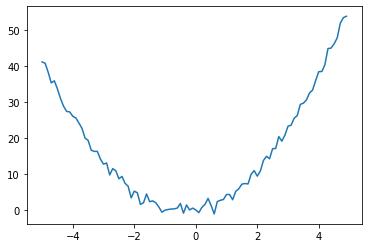

In [12]:
# 2.5 画图看一下
plt.plot(x_, y_data)
plt.show()

In [13]:
# 2.6 转为tensor 
x_train = torch.from_numpy(x_data).float()
y_train = torch.from_numpy(y_data).float().unsqueeze(1)  

In [14]:
# 3 创建模型：2输入1输出 
class PolyLinearRegression(nn.Module):
    def __init__(self):
        super(PolyLinearRegression, self).__init__()
        self.ploy = nn.Linear(2, 1)  

    def forward(self, x):
        out = self.ploy(x)
        return out

In [15]:
def train_and_test():
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        model = PolyLinearRegression()
        model.to(device)
    else:
        device = torch.device("cpu")
        model = PolyLinearRegression()
        model.to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    loss_list = []
    for i in range(10000):
        i += 1

        inputs = x_train.to(device)
        labels = y_train.to(device)

        # 1 前向传播
        output = model(inputs)
        # 计算损失
        loss = criterion(output, labels)

        # 2 反向传播
        # 梯度要清0
        optimizer.zero_grad()
        loss.backward()
        # 更新权重参数
        optimizer.step()

        # 打印
        if i % 10 == 0:
            print("迭代次数：%d,  loss值：%.8f" % (i, loss.item()))
            loss_list.append(loss.item())

    # 测试模式
    model.eval()
    predict = model(x_train).data.numpy()
    plt.plot(x_, y_train)
    plt.plot(x_, predict)
    plt.show()

    plt.plot(loss_list)
    plt.show()
    
    # 查看参数
    for p in model.parameters():
        print(p)

迭代次数：10,  loss值：18.50533676
迭代次数：20,  loss值：10.88192368
迭代次数：30,  loss值：8.04247379
迭代次数：40,  loss值：6.02065754
迭代次数：50,  loss值：4.57536602
迭代次数：60,  loss值：3.54217911
迭代次数：70,  loss值：2.80359244
迭代次数：80,  loss值：2.27559948
迭代次数：90,  loss值：1.89815068
迭代次数：100,  loss值：1.62832379
迭代次数：110,  loss值：1.43542659
迭代次数：120,  loss值：1.29752588
迭代次数：130,  loss值：1.19894004
迭代次数：140,  loss值：1.12845707
迭代次数：150,  loss值：1.07806528
迭代次数：160,  loss值：1.04203510
迭代次数：170,  loss值：1.01627159
迭代次数：180,  loss值：0.99784768
迭代次数：190,  loss值：0.98467088
迭代次数：200,  loss值：0.97524458
迭代次数：210,  loss值：0.96849942
迭代次数：220,  loss值：0.96367162
迭代次数：230,  loss值：0.96021414
迭代次数：240,  loss值：0.95773673
迭代次数：250,  loss值：0.95595950
迭代次数：260,  loss值：0.95468307
迭代次数：270,  loss值：0.95376533
迭代次数：280,  loss值：0.95310342
迭代次数：290,  loss值：0.95262432
迭代次数：300,  loss值：0.95227653
迭代次数：310,  loss值：0.95202255
迭代次数：320,  loss值：0.95183593
迭代次数：330,  loss值：0.95169711
迭代次数：340,  loss值：0.95159274
迭代次数：350,  loss值：0.95151353
迭代次数：360,  loss值：0.95145166

迭代次数：5690,  loss值：0.95033109
迭代次数：5700,  loss值：0.95033115
迭代次数：5710,  loss值：0.95033085
迭代次数：5720,  loss值：0.95033073
迭代次数：5730,  loss值：0.95033103
迭代次数：5740,  loss值：0.95033079
迭代次数：5750,  loss值：0.95033115
迭代次数：5760,  loss值：0.95033121
迭代次数：5770,  loss值：0.95033115
迭代次数：5780,  loss值：0.95033115
迭代次数：5790,  loss值：0.95033103
迭代次数：5800,  loss值：0.95033097
迭代次数：5810,  loss值：0.95033127
迭代次数：5820,  loss值：0.95033097
迭代次数：5830,  loss值：0.95033097
迭代次数：5840,  loss值：0.95033079
迭代次数：5850,  loss值：0.95033127
迭代次数：5860,  loss值：0.95033109
迭代次数：5870,  loss值：0.95033091
迭代次数：5880,  loss值：0.95033127
迭代次数：5890,  loss值：0.95033091
迭代次数：5900,  loss值：0.95033133
迭代次数：5910,  loss值：0.95033091
迭代次数：5920,  loss值：0.95033091
迭代次数：5930,  loss值：0.95033121
迭代次数：5940,  loss值：0.95033103
迭代次数：5950,  loss值：0.95033073
迭代次数：5960,  loss值：0.95033103
迭代次数：5970,  loss值：0.95033091
迭代次数：5980,  loss值：0.95033079
迭代次数：5990,  loss值：0.95033073
迭代次数：6000,  loss值：0.95033091
迭代次数：6010,  loss值：0.95033085
迭代次数：6020,  loss值：0.95033067
迭代次数：6030,  lo

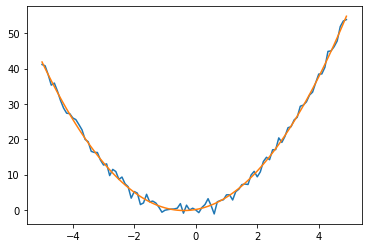

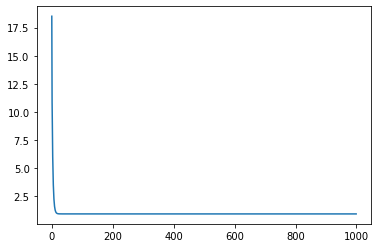

Parameter containing:
tensor([[1.5040, 1.9692]], requires_grad=True)
Parameter containing:
tensor([0.1418], requires_grad=True)


In [16]:
train_and_test()